In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all, reviews

In [30]:
%timeit
rev = reviews(
    #'net.one97.paytm',
    'com.google.android.apps.nbu.paisa.user',
    lang='en', # defaults to 'en'
    country='in', # defaults to 'us'
    count= 100000,
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)


In [31]:
df = pd.DataFrame(np.array(rev[0]),columns=['review'])

In [32]:
df = df.join(pd.DataFrame(df.pop('review').tolist()))

In [33]:
min(df['at'])

Timestamp('2022-08-03 13:49:40')

In [34]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,7921a259-2405-4439-bda7-930e442c4907,Tarun Chauhan,https://play-lh.googleusercontent.com/a/AEdFTp...,Nice,5,0,69.0.001_RC03 (arm64-v8a),2023-02-04 12:44:11,None,NaT
1,c73bb6d3-f037-4ee6-93c4-f8e2bfa5214f,Rohan Kumar Kumar,https://play-lh.googleusercontent.com/a/AEdFTp...,Rohankumar Vbccccxyvxgtckbycxx Bhjjcfm Hjhvfhh...,1,0,None,2023-02-04 12:40:09,None,NaT
2,caa80ea3-5e94-442a-942b-cea8af8d7e46,sukh choudhary,https://play-lh.googleusercontent.com/a-/AD5-W...,Good application,5,0,170.1.5 (armeabi-v7a_release_flutter),2023-02-04 12:38:48,None,NaT
3,2dac18c3-69c4-46dd-ae62-9b31eceececc,Bobby Mehra,https://play-lh.googleusercontent.com/a/AEdFTp...,Bobi,1,0,170.1.5 (armeabi-v7a_release_flutter),2023-02-04 12:38:11,None,NaT
4,dfe099b9-7290-47ff-8578-0047fd97308d,Sandeep Thakur,https://play-lh.googleusercontent.com/a/AEdFTp...,Tyt app,1,0,170.1.5 (arm64-v8a_release_flutter),2023-02-04 12:33:42,None,NaT


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

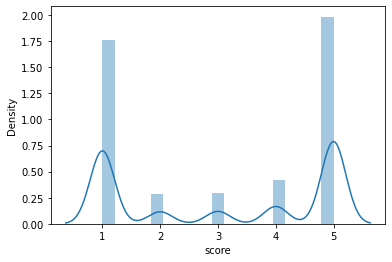

In [48]:
sns.distplot(df[df['content'].str.len()>10].score)

In [47]:
df[df['content'].str.len()>10]['content']

1        Rohankumar Vbccccxyvxgtckbycxx Bhjjcfm Hjhvfhh...
2                                         Good application
6                                     Not money transfared
7              Does not scan gray QR codes internationally
9        So many payment failures, such a buggy and pat...
                               ...                        
99986                   Hi excellent good better and wuick
99990                                          Very useful
99992                              Super fast transfer app
99998               I have nice experience with Google pay
99999    Very very dissapointed with the experience. Ev...
Name: content, Length: 46679, dtype: object